# Data Analysis - Salesianos

In this notebook, the data resulting from the experiment with the AR Geography App in the Zubiri Manteo school will be analysed. The data includes both the raw data compiled from the app and the student surveys. There are two types of students based on the device they use during the experiment: PC (they can see what other students do and provide suggestions) or mobile (they can also receive questions from the teacher and answer them). After the trial, the students were given a survey consisting of a number of questions, which they had to rate from 1 to 5. There were 16 common questions, 2 questions phrased slightly differently for mobile/PC users, and 2 questions only for mobile users. 9 of the students used a mobile device, and another 9 students used a PC


## Student Surveys

In this section we will analyse the student surveys that were completed after the experiment. This part of the analysis will focus on the common questions first, and later on the questions answered only by students using a mobile device. The 2 questions phrased differently are #18 and #20:

* Being able to use augmented reality / 3D elements makes the application more entertaining
* Thanks to augmented reality / 3D elements I have felt immersed in the learning activity

Where the words "augmented reality" were used in the questionnaires filled by the students using a mobile device, and "3D elements" in case of students on PC.

In [1]:
# If you want to use help from chatGPT, uncomment the following line
%load_ext ask_ai.magics
# make sure that you have stored your OpenAI API key in the variable OPENAI_API_KEY

In [2]:
# And import the necessary libraries. xapi_analysis is the package we created to help analysing xapi statements
from xapi_analysis.input_csv import *
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt

# Let's also set some useful display constants for pandas
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500
pd.options.display.max_colwidth = 500

# And something for plotting better images, too.
plt.rcParams['figure.figsize'] = [16,9]
plt.rcParams['axes.titlesize'] = 18     # fontsize of the axes title
plt.rcParams['axes.labelsize'] = 14    # fontsize of the x and y labels
plt.rcParams['xtick.labelsize'] = 13    # fontsize of the tick labels
plt.rcParams['ytick.labelsize'] = 13    # fontsize of the tick labels
plt.rcParams['legend.fontsize'] = 13    # legend fontsize
plt.rcParams['font.size'] = 13
cmap = sns.color_palette('icefire', as_cmap=True)

In [3]:
SURVEY_FILE = Path('./questionnaire_answers.xlsx')
SHEET_NAME = 'SALESIANOS'
NUM_ROWS = 22
COLS = list(range(21))
COLS.pop(1) # remove second index from excel

survey_answers = pd.read_excel(SURVEY_FILE, sheet_name=SHEET_NAME, index_col=0, nrows=NUM_ROWS, 
                               usecols=COLS)

In [4]:
survey_answers.head(3)

,QUESTIONS,Type,iPad1,iPad2,Tablet1,Tablet2,iPhone1,Android1,Android2,Android3,Android4,PC002,PC003,PC004,PC005,PC006,PC007,PC008,PC009
Q-M,,,,,,,,,,,,,,,,,,,
1,I think that I would like to use the application frequently.,Collaboration,3,3,4,5,3,5,4,3,3,3.0,3.0,3.0,3.0,1.0,4.0,3.0,4.0
2,I found the application to be simple.,Usability,4,4,5,4,3,2,3,3,3,4.0,4.0,4.0,3.0,2.0,4.0,4.0,5.0
3,I thought the application was easy to use.,Usability,4,3,4,4,3,4,3,3,4,5.0,4.0,3.0,2.0,1.0,4.0,4.0,5.0


Let's see what are the questions that have obtained the highest and the lowest average ratings:

In [5]:
survey_answers['mean'] = survey_answers.mean(numeric_only=True, axis=1)
questions_avg = survey_answers[["QUESTIONS", "mean"]]
questions_avg = questions_avg.sort_values("mean")
questions_avg

,QUESTIONS,mean
Q-M,,
1,I think that I would like to use the application frequently.,3.352941
7,I found the application very intuitive.,3.529412
3,I thought the application was easy to use.,3.529412
10,I would like to use the application during a test,3.588235
2,I found the application to be simple.,3.588235
6,I would imagine that most people would learn to use the application very quickly.,3.705882
8,I felt very confident using the application.,3.705882
4,I think that I could use the application without the support of a technical person.,3.705882
20,Thanks to augmented reality / 3D elements I have felt immersed in the learning activity,3.764706


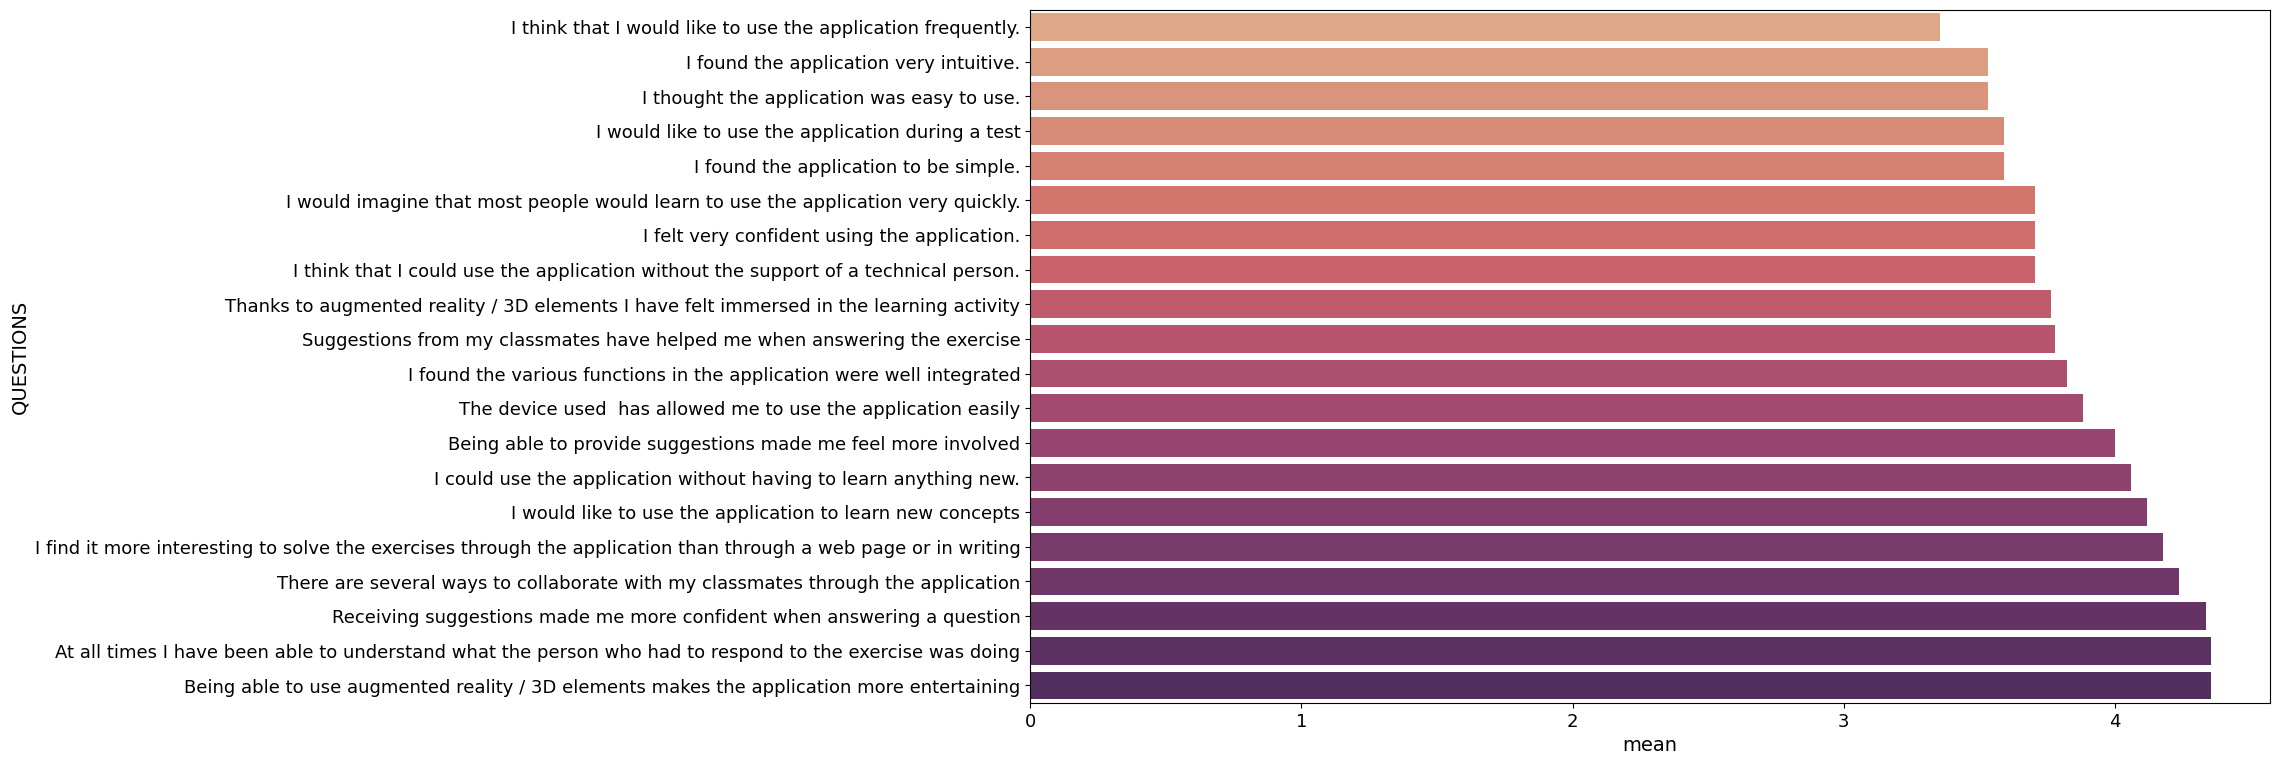

In [6]:
create_barplot(questions_avg, 'mean', 'QUESTIONS')

By computing the average score obtained for each question we can get a general idea of the highest rated questions, i.e., the questions with which the students agree more, and the lowest rated questions. The highest rated questions are:

* At all times I have been able to understand what the person who had to respond to the exercise was doing
* There are several ways to collaborate with my classmates through the application
* I find it more interesting to solve the exercises through the application than through a web page or in writing

while the lowest rated questions are:

* I think that I would like to use the application frequently.
* I thought the application was easy to use.
* I found the application very intuitive.

At first glance, the common reaction to the experiment is that the application is an interesting approach to solving the exercises. However, the lowest rated questions all relate to the user experience and the students' interest in using it frequently, although the scores were high. It will be interesting to compare the ratings for the usability questions in the mobile-only and PC-only datasets.

Let's check better the questions who received the top and bottom scores

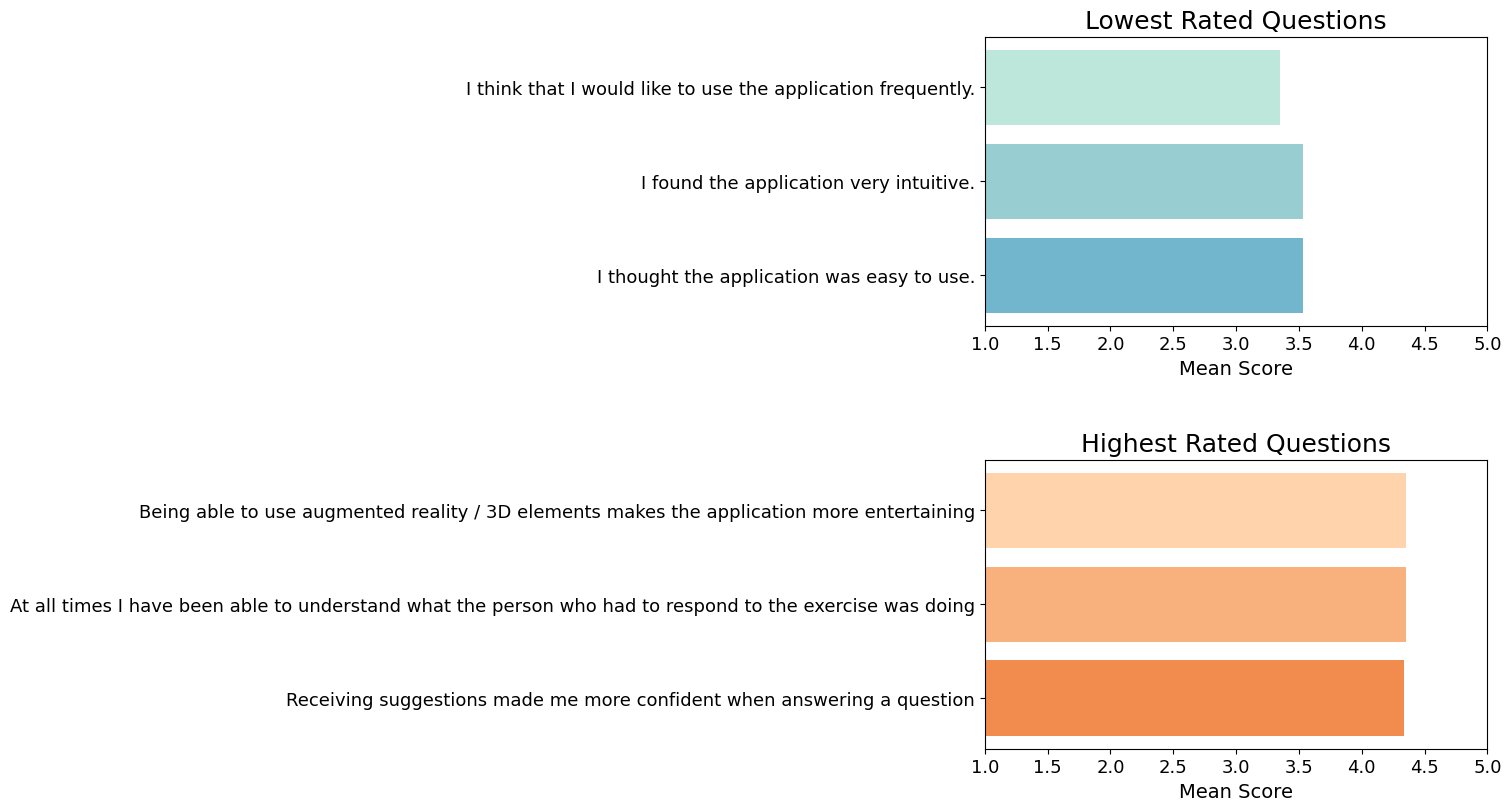

In [7]:
f, axs = plt.subplots(2,1)

colors = [cmap(i) for i in np.linspace(0, 1, len(questions_avg))]

axs[0].barh(questions_avg['QUESTIONS'].iloc[:3], questions_avg['mean'].iloc[:3], color=colors[:3], align='center')
axs[0].set_title('Lowest Rated Questions')
axs[0].set_xlabel('Mean Score')
axs[0].set_xlim(1,5)
axs[0].invert_yaxis()

axs[1].barh(questions_avg['QUESTIONS'].iloc[-3:], questions_avg['mean'].iloc[-3:], color=colors[-3:], align='center')
axs[1].set_title('Highest Rated Questions')
axs[1].set_xlabel('Mean Score')
axs[1].set_xlim(1,5)

f.tight_layout(pad=3.0)

plt.show()

#### 2) Analysis of the student answers

Now let's analyse the same data but from the perspective of the students.

In [8]:
students_avg = survey_answers.drop(["QUESTIONS", "Type"], axis=1)
student_list = students_avg.mean().sort_values()
student_list = pd.DataFrame(student_list).reset_index()
student_list.columns = ["Student", "mean"]
student_list

,Student,mean
0,PC006,2.333333
1,Android3,3.350000
2,iPhone1,3.600000
3,Android4,3.650000
4,Android2,3.700000
5,PC005,3.833333
6,mean,3.879085
7,PC007,3.888889
8,Tablet2,3.900000
9,Android1,3.900000


(1.0, 5.0)

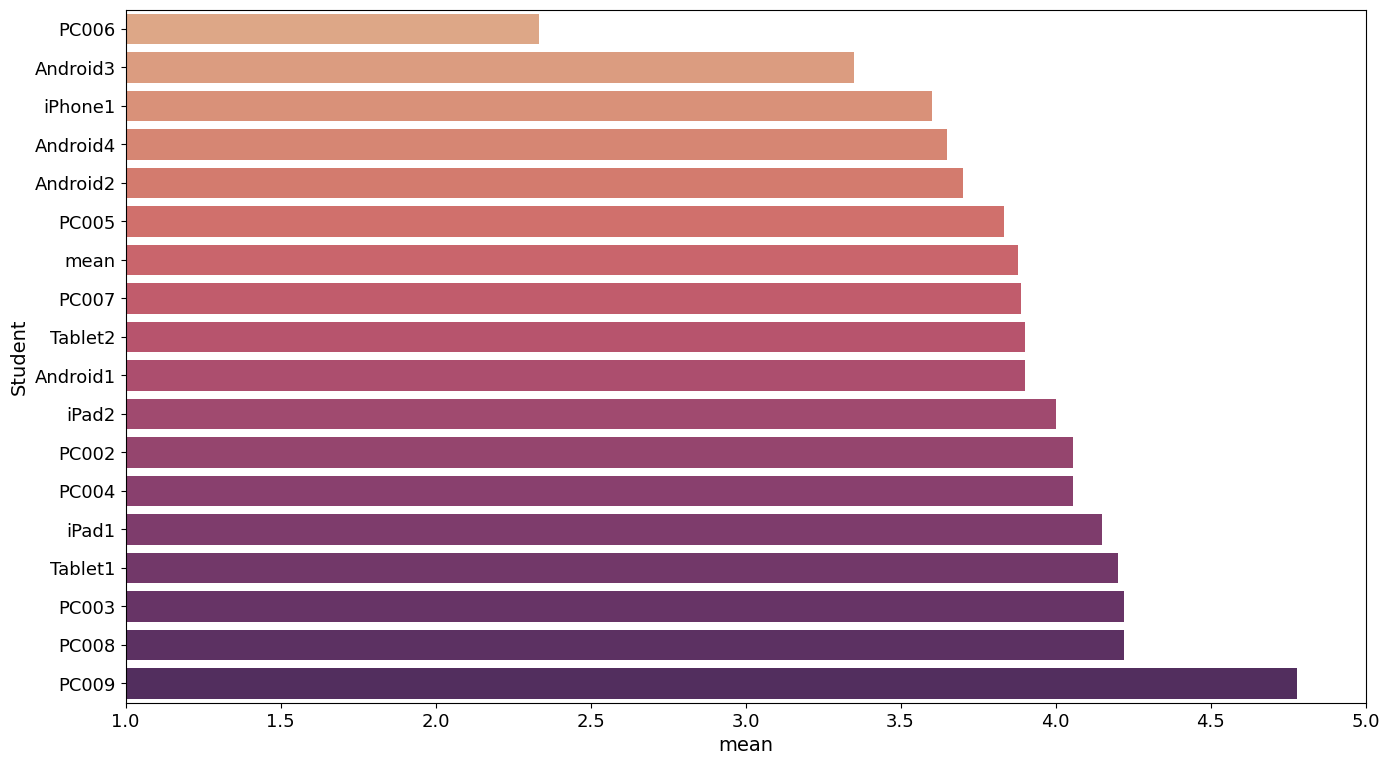

In [9]:
create_barplot(student_list, 'mean', 'Student')
plt.xlim(1,5)

This plot doesn't show any significant difference of opinion between mobile and PC users, but we will further check on that. It is interesting to note the presence of two outliers, one with very low average score, and one with a very high one. Both students were using a PC.

In [ ]:
pc_list = student_list[student_list["Student"].str.startswith(("PC"))]
pc_list_mean = pc_list["mean"].mean()
print(f"PC-only average score: {pc_list_mean}")

In [10]:
mobile_list = student_list[student_list["Student"].str.startswith(("Android", "iPhone", "iPad", "Tablet"))]
pc_list = student_list[student_list["Student"].str.startswith(("PC"))]
mobile_list_mean = mobile_list["mean"].mean()
pc_list_mean = pc_list["mean"].mean()
print(f"Mobile-only average score: {mobile_list_mean}")
print(f"PC-only average score: {pc_list_mean}")

Mobile-only average score: 3.827777777777778
PC-only average score: 3.923611111111111


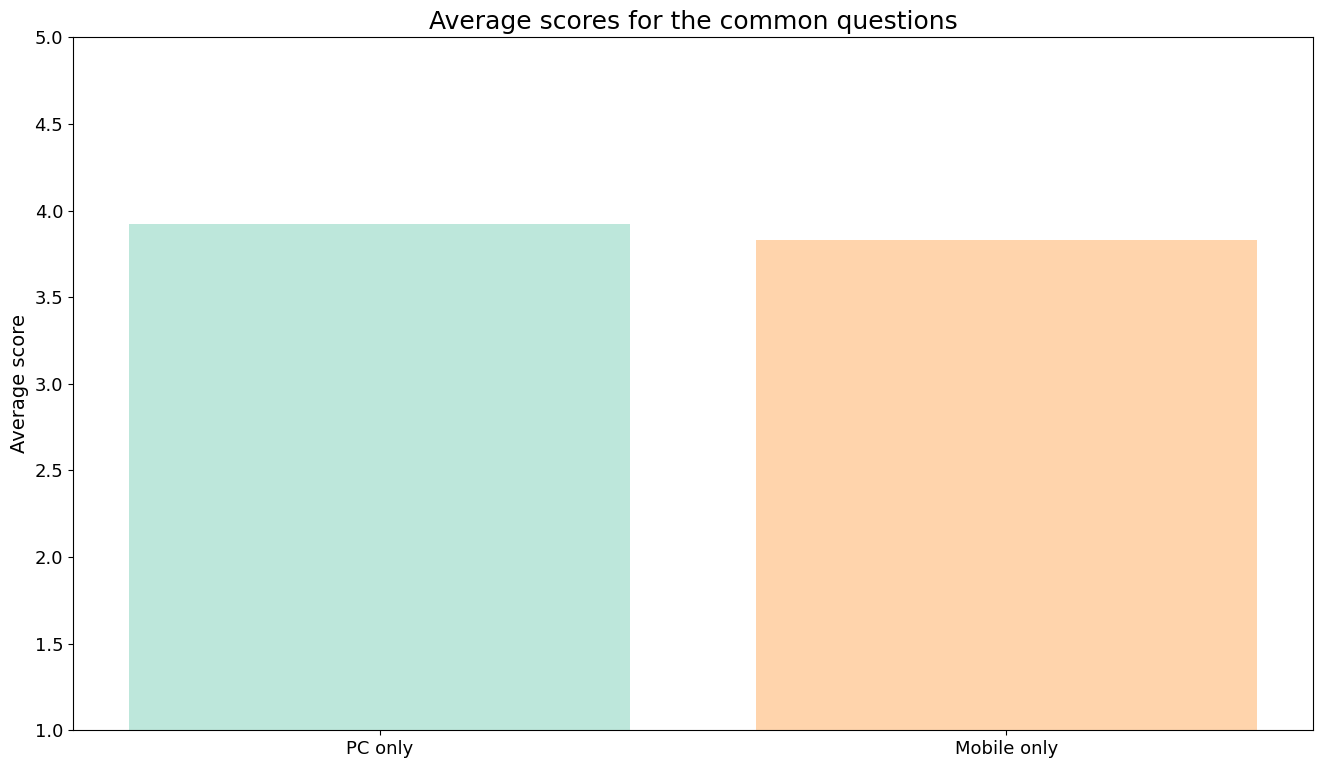

In [11]:
names = ["PC only", "Mobile only"]
values = [pc_list_mean, mobile_list_mean]
colors = [cmap(i) for i in np.linspace(0, 1, len(values))]

plt.bar(names, values, color=colors)
plt.title("Average scores for the common questions")
plt.ylabel("Average score")
plt.ylim(1,5)
plt.show()

We can see that the PC-only students have given a slightly higher average score to the questions in the survey. We will check on this information later when we analyse the specific questions for each student type.

#### 3) Analysis of the question types

The final analysis for the common questions will tackle the question types. There are 4 questions types:

* Collaboration: Collaborative aspects of the app
* Functionality: App Functionalities
* Usability: App Usability
* Education: Interest as educational tool

In [13]:
students_q_type = survey_answers[["Type", "mean"]]
students_q_type = students_q_type.groupby("Type", as_index=False)["mean"].mean().sort_values("mean")
students_q_type

,Type,mean
3,Usability,3.713235
2,Functionality,3.823529
1,Education,4.000000
0,Collaboration,4.008715


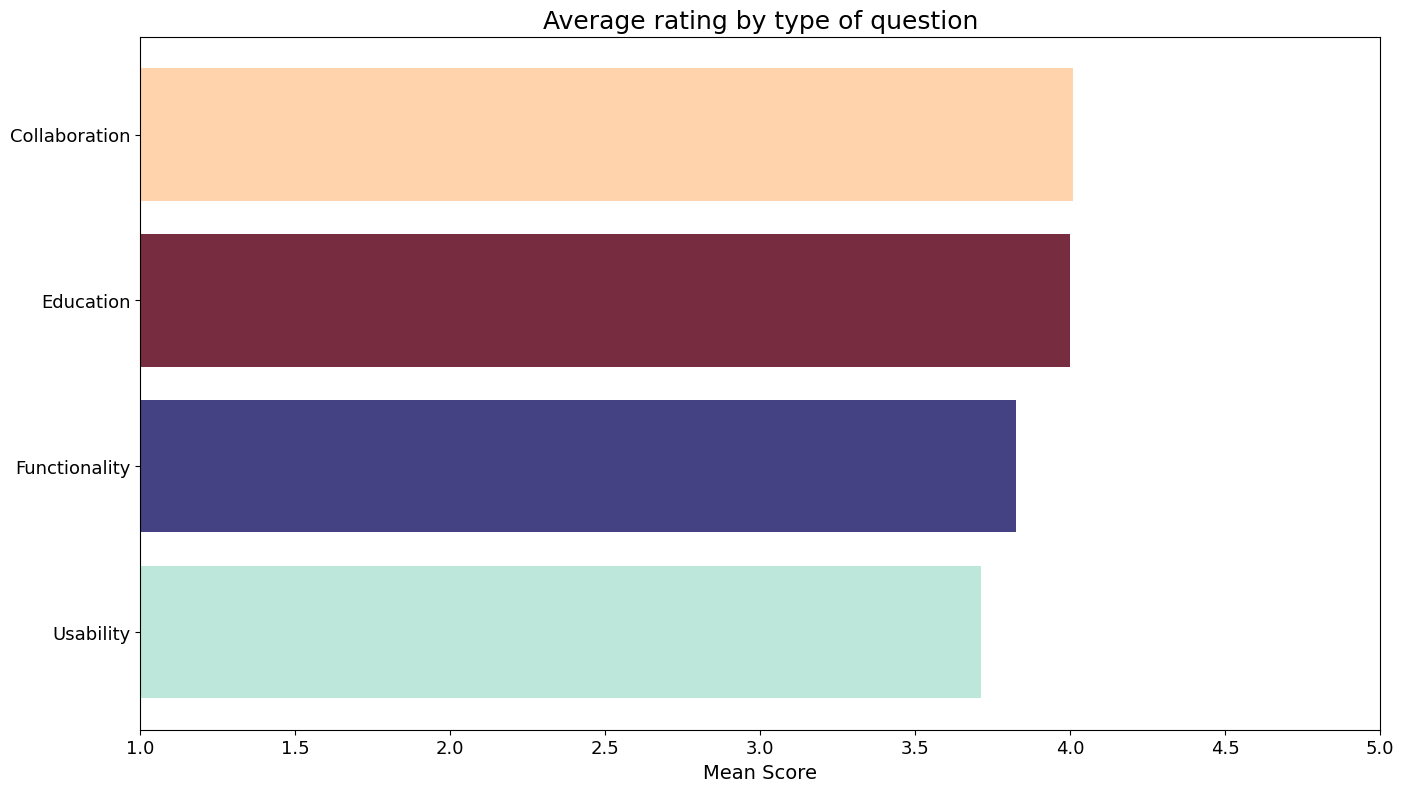

In [14]:
colors = [cmap(i) for i in np.linspace(0, 1, len(students_q_type))]

fig = plt.figure()
plt.barh(students_q_type['Type'], students_q_type['mean'], color=colors, align='center')
plt.title('Average rating by type of question')
plt.xlabel('Mean Score')
plt.xlim(1,5)
plt.show()

The highest rated questions are the collaboration ones, while the lowest rated questions are the usability ones.

## xAPI statements analysis

Let's analyze now the xAPI statements collected automatically through the application.

Education is the highest rated question type for PC students.

In [15]:
df = pd.read_csv("statements_salesianos_clean.csv", index_col=0).reset_index(drop=True)
df.head()

,timestamp,stored,actor,verb,object,result
0,2023-03-10 11:41:29.439000+00:00,2023-03-10T11:41:29.439Z,Nuria,Logged In,Salesianos,NaN
1,2023-03-10 11:41:41.906000+00:00,2023-03-10T11:41:41.906Z,Eider,Logged In,Salesianos,NaN
2,2023-03-10 11:41:42.372000+00:00,2023-03-10T11:41:42.372Z,Janire,Logged In,Salesianos,NaN
3,2023-03-10 11:42:19.063000+00:00,2023-03-10T11:42:19.063Z,Lucia,Logged In,Salesianos,NaN
4,2023-03-10 11:42:29.061000+00:00,2023-03-10T11:42:29.061Z,unai,Logged In,Salesianos,NaN


The three most important columns are **actor**-**verb**-**object**, which create a sentence-like structure. We can see the actions that the app registers from the **verb** column:

In [16]:
df["verb"].unique()

array(['Logged In', 'Placed', 'Swiped', 'Asked', 'Started', 'Logged Out',
       'Accepted', 'Set Turn', 'Suggested', 'Ran Out', 'Sent', 'Checked',
       'Assigned', 'Canceled', 'Ended'], dtype=object)

#### 1) Student interactions with the app (and how they correlate with the survey answers)

We will start the app data analysis by looking at the number of total interactions that the students had. First, we have to clean the dataset because the actor column includes some names that should not be included, as well as one student who had to leave (Android3).

In [17]:
df["actor"].unique()

array(['Nuria', 'Eider', 'Janire', 'Lucia', 'unai', 'Teacher', 'PC006',
       'PC008', 'Tablet1', 'PC004', 'PC009', 'PC007', 'PC003', 'Iphone 1',
       'PC005', 'iPad2', 'Tablet 2', 'Android1', 'Android2', 'iPad1',
       'PC002', 'Android4', 'Android3', 'iphone 1', 'iPhone 1', 'Ipad1',
       'Tablet1 ', 'Ipad2'], dtype=object)

In [18]:
df[(df["actor"]=="Android3")]

,timestamp,stored,actor,verb,object,result
49,2023-03-10 11:53:16.210000+00:00,2023-03-10T11:53:16.210Z,Android3,Logged In,Salesianos,"{""score"":{""raw"":0}}"
55,2023-03-10 11:53:36.050000+00:00,2023-03-10T11:53:36.050Z,Android3,Placed,Earth,"{""score"":{""raw"":0}}"


In [19]:
a = ["Nuria", "Eider", "Janire", "Lucia", "unai", "Android3"]
students_app = df[~df['actor'].isin(a)]
students_app["actor"].unique()

array(['Teacher', 'PC006', 'PC008', 'Tablet1', 'PC004', 'PC009', 'PC007',
       'PC003', 'Iphone 1', 'PC005', 'iPad2', 'Tablet 2', 'Android1',
       'Android2', 'iPad1', 'PC002', 'Android4', 'iphone 1', 'iPhone 1',
       'Ipad1', 'Tablet1 ', 'Ipad2'], dtype=object)

We should further clean the dataset so that the actor names are the same as in the surveys.

In [20]:
students_app = students_app.replace({"actor": {"Iphone 1": "iPhone1", "iphone 1": "iPhone1", "Ipad1": "iPad1", "Ipad2": "iPad2"}})
students_app["actor"] = students_app["actor"].str.replace(" ","")
students_app["actor"].unique()

array(['Teacher', 'PC006', 'PC008', 'Tablet1', 'PC004', 'PC009', 'PC007',
       'PC003', 'iPhone1', 'PC005', 'iPad2', 'Tablet2', 'Android1',
       'Android2', 'iPad1', 'PC002', 'Android4'], dtype=object)

We won't count "Logged In" or "Logged Out" as interactions, since they do not contribute to the real use of the app:

In [21]:
actions = ["Logged In", "Logged Out"]
students_app_interactions = students_app[~students_app['verb'].isin(actions)]
students_app_interactions["verb"].unique()

array(['Placed', 'Swiped', 'Asked', 'Started', 'Accepted', 'Set Turn',
       'Suggested', 'Ran Out', 'Sent', 'Checked', 'Assigned', 'Canceled',
       'Ended'], dtype=object)

In [22]:
interactions = students_app_interactions.groupby(['actor'])["verb"].agg(['count']).sort_values("count")
interactions

,count
actor,
PC009,6
PC006,13
PC008,19
PC002,21
PC004,32
PC007,42
PC003,43
iPhone1,86
iPad1,87


The previous aggregation clearly shows that the PC students have significantly less interactions than the mobile students. This is due to their only interaction being the suggestions, as can be shown in the next line:

In [23]:
students_app_interactions[(students_app_interactions["actor"]=="PC009")]["verb"].unique()

array(['Suggested'], dtype=object)

Let's plot the number of interactions:

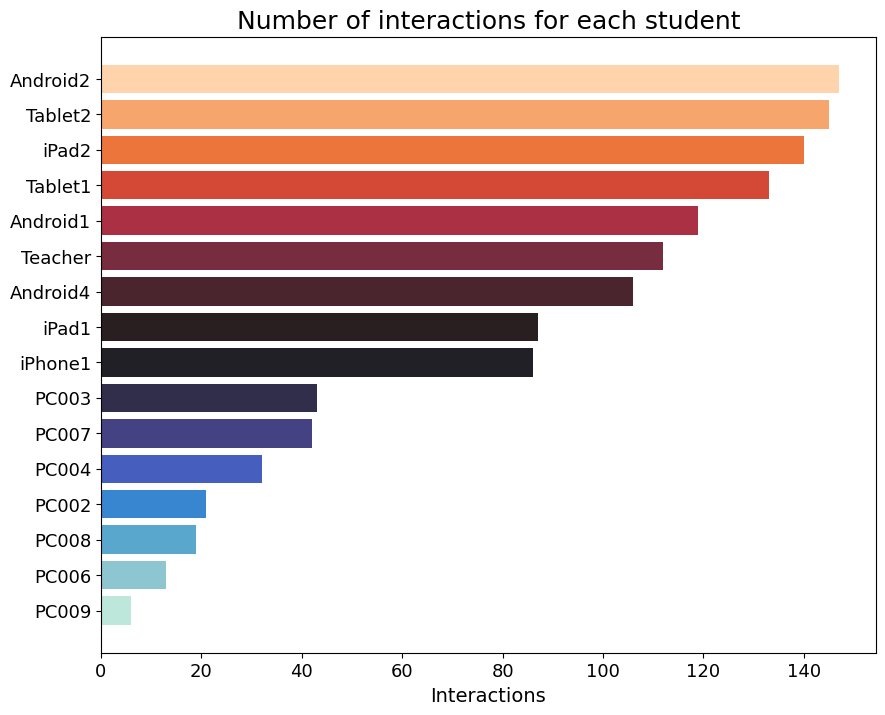

In [24]:
colors = [cmap(i) for i in np.linspace(0, 1, len(interactions))]

fig = plt.figure(figsize=(10, 8))
plt.barh(interactions.index, interactions['count'], color=colors, align='center')
plt.title('Number of interactions for each student')
plt.xlabel('Interactions')
plt.show()

The interesting aspect to analyse is whether there is any correlation between the number of interactions for each student and the answers they have given to the survey questions. We will follow two statistical approaches:

1) **Correlation analysis**: We will investigate whether there is a correlation between the number of interactions and the average scores given to the questions by the students. To do this, we will calculate the Pearson correlation coefficient and the corresponding p-value. The Pearson correlation coefficient measures the strength and direction of the linear relationship between the interactions and the scores, and the p-value indicates whether this relationship is statistically significant. If the p-value is below a significance level of 0.05, we can conclude that there is evidence of a significant correlation between the interactions and the survey scores.

2) **Hypothesis testing**: We will also perform a hypothesis test to investigate whether the survey answers given by students who had a high number of interactions are significantly different from the survey answers given by students who had a low number of interactions. We will perform a two-sample t-test assuming equal variances, which returns the t-statistic and the corresponding p-value. As in the previous analysis, if the p-value is below 0.05, we can conclude that there is evidence of a significant difference in survey answers between the two groups.

Since the interactions between the PC and mobile users are significantly different, we will also perform the analysis for the PC dataset and the mobile dataset separately.

In [25]:
interactions = interactions.reset_index()
int_df = student_list.merge(interactions, left_on="Student", right_on="actor").drop("actor", axis=1)
int_pc_df = pc_list.merge(interactions, left_on="Student", right_on="actor").drop("actor", axis=1)
int_mobile_df = mobile_list.merge(interactions, left_on="Student", right_on="actor").drop("actor", axis=1)

In [26]:
from scipy.stats import ttest_ind, pearsonr

high_interactions = int_df["mean"][int_df["count"] >= int_df["count"].mean()]
low_interactions = int_df["mean"][int_df["count"] < int_df["count"].mean()]

t_stat, p_value = ttest_ind(high_interactions, low_interactions)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}\n")

corr_coef, p_value = pearsonr(int_df["count"], int_df["mean"])
print(f"Pearson correlation coefficient: {corr_coef}")
print(f"P-value: {p_value}")

T-statistic: -0.17455833741853632
P-value: 0.8641158895262022

Pearson correlation coefficient: -0.013387547796158472
P-value: 0.9622317863744497


In [27]:
high_interactions = int_mobile_df["mean"][int_mobile_df["count"] >= int_mobile_df["count"].mean()]
low_interactions = int_mobile_df["mean"][int_mobile_df["count"] < int_mobile_df["count"].mean()]

t_stat, p_value = ttest_ind(high_interactions, low_interactions)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}\n")

corr_coef, p_value = pearsonr(int_mobile_df["count"], int_mobile_df["mean"])
print(f"Pearson correlation coefficient: {corr_coef}")
print(f"P-value: {p_value}")

T-statistic: 0.762492851663023
P-value: 0.47466443950820614

Pearson correlation coefficient: 0.15239164290739837
P-value: 0.7186586286827195


In [28]:
high_interactions = int_pc_df["mean"][int_pc_df["count"] >= int_pc_df["count"].mean()]
low_interactions = int_pc_df["mean"][int_pc_df["count"] < int_pc_df["count"].mean()]

t_stat, p_value = ttest_ind(high_interactions, low_interactions)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}\n")

corr_coef, p_value = pearsonr(int_pc_df["count"], int_pc_df["mean"])
print(f"Pearson correlation coefficient: {corr_coef}")
print(f"P-value: {p_value}")

T-statistic: 0.33091276911561696
P-value: 0.7541278481693943

Pearson correlation coefficient: 0.09577375786667863
P-value: 0.8381540819502974


Since none of the p-values are below the significance level of 0.05 we have set and the correlation coefficients are very close to 0, we can conclude that there is no significant relationship between the number of interactions and the survey answers of the students.

#### 2) Mobile students' grades

When the mobile students submit an answer, the teacher assigns them a grade, which can be found in the "Assigned" action. We will study whether there is correlation between the grade the students have obtained and their answers to the survey.

In [29]:
df[(df["actor"]=="Teacher") & (df["verb"]=="Assigned")].head()

,timestamp,stored,actor,verb,object,result
321,2023-03-10 12:04:36.832000+00:00,2023-03-10T12:04:36.832Z,Teacher,Assigned,7.72;iPhone_1,NaN
373,2023-03-10 12:05:37.368000+00:00,2023-03-10T12:05:37.368Z,Teacher,Assigned,8.15;Android2,NaN
402,2023-03-10 12:06:24.752000+00:00,2023-03-10T12:06:24.752Z,Teacher,Assigned,7.72;Tablet1,NaN
546,2023-03-10 12:11:20.420000+00:00,2023-03-10T12:11:20.420Z,Teacher,Assigned,7.45;Tablet_2,NaN
587,2023-03-10 12:12:12.001000+00:00,2023-03-10T12:12:12.001Z,Teacher,Assigned,7.72;iPad2,NaN


In the previous dataframe we can see where the grades are stored. We need to extract them and clean the user names.

In [30]:
grades = pd.DataFrame(df[(df["actor"]=="Teacher") & (df["verb"]=="Assigned")]["object"].str.split(";", expand=True))
grades.columns = ["score", "student"]
grades["student"].unique()

array(['iPhone_1', 'Android2', 'Tablet1', 'Tablet_2', 'iPad2', 'iphone_1',
       'Android4', 'iPad1', 'Android1', 'Ipad1', 'Tablet1_', 'Ipad2'],
      dtype=object)

In [31]:
grades = grades.replace({"student": {"iPhone_1": "iPhone1", "iphone_1": "iPhone1", "Ipad1": "iPad1", "Ipad2": "iPad2", "Tablet_2": "Tablet2", "Tablet1_": "Tablet1"}})
grades

,score,student
321,7.72,iPhone1
373,8.15,Android2
402,7.72,Tablet1
546,7.45,Tablet2
587,7.72,iPad2
630,9.57,Android2
668,5,iPhone1
698,4.2,Android4
751,6,Tablet1
779,7.5,iPad1


In [32]:
grades["score"] = grades["score"].astype("float")
grades = grades.groupby('student', as_index=False)['score'].mean().sort_values("score")
grades

,student,score
2,Android4,2.726667
7,iPhone1,5.023333
6,iPad2,5.360000
3,Tablet1,5.430000
0,Android1,6.125000
1,Android2,7.380000
5,iPad1,7.606667
4,Tablet2,8.016667


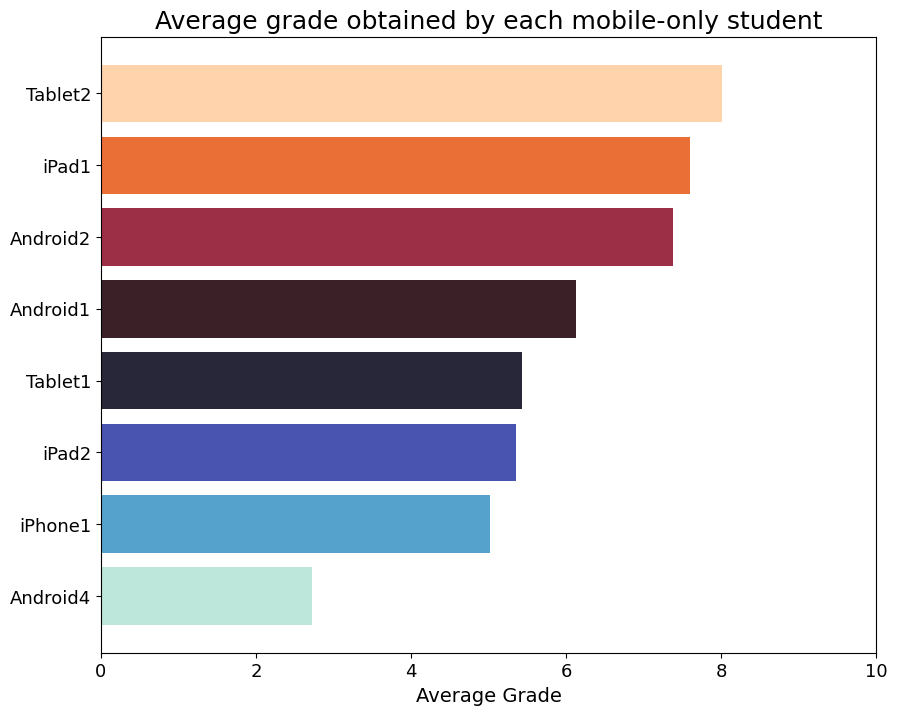

In [33]:
colors = [cmap(i) for i in np.linspace(0, 1, len(grades))]

fig = plt.figure(figsize=(10, 8))
plt.barh(grades["student"], grades['score'], color=colors, align='center')
plt.title('Average grade obtained by each mobile-only student')
plt.xlabel('Average Grade')
plt.xlim(0, 10)
plt.show()

We will now perform the same analysis than in the previous section with the survey answers to see if there is correlation between the survey answers and the grades obtained.

In [34]:
grade_df = student_list.merge(grades, left_on="Student", right_on="student").drop("student", axis=1)
grade_df

,Student,mean,score
0,iPhone1,3.60,5.023333
1,Android4,3.65,2.726667
2,Android2,3.70,7.380000
3,Tablet2,3.90,8.016667
4,Android1,3.90,6.125000
5,iPad2,4.00,5.360000
6,iPad1,4.15,7.606667
7,Tablet1,4.20,5.430000


In [35]:
high_grade = grade_df["mean"][grade_df["score"] >= grade_df["score"].mean()]
low_grade = grade_df["mean"][grade_df["score"] < grade_df["score"].mean()]

t_stat, p_value = ttest_ind(high_grade, low_grade)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}\n")

corr_coef, p_value = pearsonr(grade_df["score"], grade_df["mean"])
print(f"Pearson correlation coefficient: {corr_coef}")
print(f"P-value: {p_value}")

T-statistic: 0.29329423004270805
P-value: 0.7791772201665228

Pearson correlation coefficient: 0.36647739243776034
P-value: 0.371900936217023


Even though in this case the correlation is slightly higher, the p-value remains below our established significance level; therefore, we cannot say that there is correlation. 

Another interesting focus point would be to study the correlation between the number of interactions by the mobile-only students and the grades they've obtained:

In [36]:
int_grade_df = interactions.merge(grades, left_on="actor", right_on="student").drop("student", axis=1)
int_grade_df

,actor,count,score
0,iPhone1,86,5.023333
1,iPad1,87,7.606667
2,Android4,106,2.726667
3,Android1,119,6.125000
4,Tablet1,133,5.430000
5,iPad2,140,5.360000
6,Tablet2,145,8.016667
7,Android2,147,7.380000


In [37]:
high_grade = int_grade_df["count"][int_grade_df["score"] >= int_grade_df["score"].mean()]
low_grade = int_grade_df["count"][int_grade_df["score"] < int_grade_df["score"].mean()]

t_stat, p_value = ttest_ind(high_grade, low_grade)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}\n")

corr_coef, p_value = pearsonr(int_grade_df["score"], int_grade_df["count"])
print(f"Pearson correlation coefficient: {corr_coef}")
print(f"P-value: {p_value}")

T-statistic: 0.4395314162674946
P-value: 0.6756651127889302

Pearson correlation coefficient: 0.3091063926737644
P-value: 0.4562849490066375


This test shows us that there is no clear correlation in this case too.

#### 3) PC students suggestions

Since the PC students can only provide suggestions as their actions (or interactions with the app), this analysis has already been covered in Section 1), showing that there is no correlation between the number of suggestions sent and their answers to the survey. Besides that, the PC students do not receive grades.

#### 4) Mobile students accepted suggestions

As opposed to Section 3), we can study the mobile-only students' accepted suggestions and check whether they are correlated to their grades and to their answers to the survey.

In [38]:
accepted_suggestions = students_app[students_app["verb"]=="Accepted"]

In [39]:
accepted = accepted_suggestions.groupby(['actor'])["verb"].agg(['count']).sort_values("count").reset_index()
accepted

,actor,count
0,Android1,2
1,iPad1,3
2,iPhone1,3
3,Android2,4
4,Android4,4
5,Tablet1,4
6,Tablet2,4
7,iPad2,4


We will perform the same analysis as before, first with the survey answers:

In [40]:
accepted_df = student_list.merge(accepted, left_on="Student", right_on="actor").drop("actor", axis=1)
accepted_df

,Student,mean,count
0,iPhone1,3.60,3
1,Android4,3.65,4
2,Android2,3.70,4
3,Tablet2,3.90,4
4,Android1,3.90,2
5,iPad2,4.00,4
6,iPad1,4.15,3
7,Tablet1,4.20,4


In [41]:
high_accepted = accepted_df["count"][accepted_df["mean"] >= accepted_df["mean"].mean()]
low_accepted = accepted_df["count"][accepted_df["mean"] < accepted_df["mean"].mean()]

t_stat, p_value = ttest_ind(high_accepted, low_accepted)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}\n")

corr_coef, p_value = pearsonr(accepted_df["mean"], accepted_df["count"])
print(f"Pearson correlation coefficient: {corr_coef}")
print(f"P-value: {p_value}")

T-statistic: -0.4548588261473419
P-value: 0.6652045867249674

Pearson correlation coefficient: -2.7755575615628914e-17
P-value: 1.0


This test shows us that there is no clear correlation in this case. Let's check with the grades:

In [42]:
accepted_grades_df = grades.merge(accepted, left_on="student", right_on="actor").drop("actor", axis=1)
accepted_grades_df

,student,score,count
0,Android4,2.726667,4
1,iPhone1,5.023333,3
2,iPad2,5.360000,4
3,Tablet1,5.430000,4
4,Android1,6.125000,2
5,Android2,7.380000,4
6,iPad1,7.606667,3
7,Tablet2,8.016667,4


In [43]:
high_accepted = accepted_grades_df["count"][accepted_grades_df["score"] >= accepted_grades_df["score"].mean()]
low_accepted = accepted_grades_df["count"][accepted_grades_df["score"] < accepted_grades_df["score"].mean()]

t_stat, p_value = ttest_ind(high_accepted, low_accepted)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}\n")

corr_coef, p_value = pearsonr(accepted_grades_df["score"], accepted_grades_df["count"])
print(f"Pearson correlation coefficient: {corr_coef}")
print(f"P-value: {p_value}")

T-statistic: -0.9258200997725514
P-value: 0.39025850801980316

Pearson correlation coefficient: -0.11422490931660947
P-value: 0.7876839158153058


There is no correlation in this case either.

#### 5) Left time in students' sent answers

Our final step in the analysis will focus on the time left for the students; we will analyse its correlation with the grades.

In [44]:
time_left = students_app[students_app["verb"]=="Sent"]
time_left.head()

,timestamp,stored,actor,verb,object,result
319,2023-03-10 12:04:36.804000+00:00,2023-03-10T12:04:36.804Z,iPhone1,Sent,"(0.3478570580482483,_0.34704893827438354, 0.09247999638319016), (39.94, 14.89) 19",NaN
372,2023-03-10 12:05:37.358000+00:00,2023-03-10T12:05:37.358Z,Android2,Sent,"(0.3337985873222351,_0.3722161054611206, 0.005822139326483011), (44.10, 1.00) 14",NaN
401,2023-03-10 12:06:24.739000+00:00,2023-03-10T12:06:24.739Z,Tablet1,Sent,"(0.30835631489753723,_0.39220741391181946, 0.033011842519044876), (46.51, 6.11) 5",NaN
545,2023-03-10 12:11:20.415000+00:00,2023-03-10T12:11:20.415Z,Tablet2,Sent,"(0.2722242474555969,_0.4184000790119171, 0.02890080213546753), (51.65, 6.06) 27",NaN
589,2023-03-10 12:12:12.009000+00:00,2023-03-10T12:12:12.009Z,iPad2,Sent,"(0.3397345244884491,_0.3627608120441437, 0.05463578924536705), (42.50, 9.14) 4",NaN


In [45]:
time = pd.DataFrame(students_app[df["verb"]=="Sent"]["object"].str.split("\) ", expand=True))
time.columns = ["student", "time"]
time = time[["time"]]
time_left["time"] = time
time_left.head()

/var/folders/mb/gp2pv4vs4tb05cb9df4whm7r0000gn/T/ipykernel_9401/262902903.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  time = pd.DataFrame(students_app[df["verb"]=="Sent"]["object"].str.split("\) ", expand=True))
/var/folders/mb/gp2pv4vs4tb05cb9df4whm7r0000gn/T/ipykernel_9401/262902903.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_left["time"] = time


,timestamp,stored,actor,verb,object,result,time
319,2023-03-10 12:04:36.804000+00:00,2023-03-10T12:04:36.804Z,iPhone1,Sent,"(0.3478570580482483,_0.34704893827438354, 0.09247999638319016), (39.94, 14.89) 19",NaN,19
372,2023-03-10 12:05:37.358000+00:00,2023-03-10T12:05:37.358Z,Android2,Sent,"(0.3337985873222351,_0.3722161054611206, 0.005822139326483011), (44.10, 1.00) 14",NaN,14
401,2023-03-10 12:06:24.739000+00:00,2023-03-10T12:06:24.739Z,Tablet1,Sent,"(0.30835631489753723,_0.39220741391181946, 0.033011842519044876), (46.51, 6.11) 5",NaN,5
545,2023-03-10 12:11:20.415000+00:00,2023-03-10T12:11:20.415Z,Tablet2,Sent,"(0.2722242474555969,_0.4184000790119171, 0.02890080213546753), (51.65, 6.06) 27",NaN,27
589,2023-03-10 12:12:12.009000+00:00,2023-03-10T12:12:12.009Z,iPad2,Sent,"(0.3397345244884491,_0.3627608120441437, 0.05463578924536705), (42.50, 9.14) 4",NaN,4


In [46]:
time_left_df = time_left[["actor", "time"]]
time_left_df

,actor,time
319,iPhone1,19
372,Android2,14
401,Tablet1,5
545,Tablet2,27
589,iPad2,4
631,Android2,23
670,iPhone1,11
697,Android4,17
750,Tablet1,6
776,iPad1,16


In [47]:
time_left_df["time"] = time_left_df["time"].astype("float")
time_left_df = time_left_df.groupby('actor', as_index=False)['time'].mean().sort_values("time")
time_left_df

/var/folders/mb/gp2pv4vs4tb05cb9df4whm7r0000gn/T/ipykernel_9401/4089997652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_left_df["time"] = time_left_df["time"].astype("float")


,actor,time
3,Tablet1,8.250000
7,iPhone1,15.000000
6,iPad2,15.500000
1,Android2,17.250000
4,Tablet2,20.333333
0,Android1,21.000000
5,iPad1,22.000000
2,Android4,23.666667


In [48]:
time_grades_df = grades.merge(time_left_df, left_on="student", right_on="actor").drop("actor", axis=1)
time_grades_df

,student,score,time
0,Android4,2.726667,23.666667
1,iPhone1,5.023333,15.000000
2,iPad2,5.360000,15.500000
3,Tablet1,5.430000,8.250000
4,Android1,6.125000,21.000000
5,Android2,7.380000,17.250000
6,iPad1,7.606667,22.000000
7,Tablet2,8.016667,20.333333


In [49]:
high = time_grades_df["time"][time_grades_df["score"] >= time_grades_df["score"].mean()]
low = time_grades_df["time"][time_grades_df["score"] < time_grades_df["score"].mean()]

t_stat, p_value = ttest_ind(high, low)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}\n")

corr_coef, p_value = pearsonr(time_grades_df["score"], time_grades_df["time"])
print(f"Pearson correlation coefficient: {corr_coef}")
print(f"P-value: {p_value}")

T-statistic: 1.369093947745519
P-value: 0.22000660813079792

Pearson correlation coefficient: 0.032677627355649164
P-value: 0.9387730523147906


There is no correlation in this case either.

## AI-based analysis: dimensionality reduction and clustering of the data

Even though the lack of data for this use case makes the application of AI a hard task, we can try to incorporate some elements into this case. For instance, let's focus only on the mobile students, since they have a greater number of features to work with. Let's assume that the average grade they obtain in the app (which we have analysed in section 2) in the App data section) is a function of the number of interactions they have made, the number of accepted suggestions, the time they have left, and the average score for the survey answers.

We will apply a PCA (Principal Component Analysis) model to find out the principal components that explain the variance in the data, in this case the obtained grades. We will also be able to visualize the relationships between the principal components and the grades in a 2D space and create clusters for them.

In [50]:
accepted_suggestions = accepted_grades_df.drop("score", axis=1)

In [54]:
df_ai = time_grades_df.merge(accepted_suggestions, left_on="student", right_on="student")
ai = df_ai.merge(int_mobile_df, left_on="student", right_on="Student").drop("Student", axis=1)
ai.columns = ["student", "grade", "time_left", "accepted_suggestions", "survey_score", "interactions"]
ai

,student,grade,time_left,accepted_suggestions,survey_score,interactions
0,Android4,2.726667,23.666667,4,3.65,106
1,iPhone1,5.023333,15.000000,3,3.60,86
2,iPad2,5.360000,15.500000,4,4.00,140
3,Tablet1,5.430000,8.250000,4,4.20,133
4,Android1,6.125000,21.000000,2,3.90,119
5,Android2,7.380000,17.250000,4,3.70,147
6,iPad1,7.606667,22.000000,3,4.15,87
7,Tablet2,8.016667,20.333333,4,3.90,145


<Axes: xlabel='PC1', ylabel='PC2'>

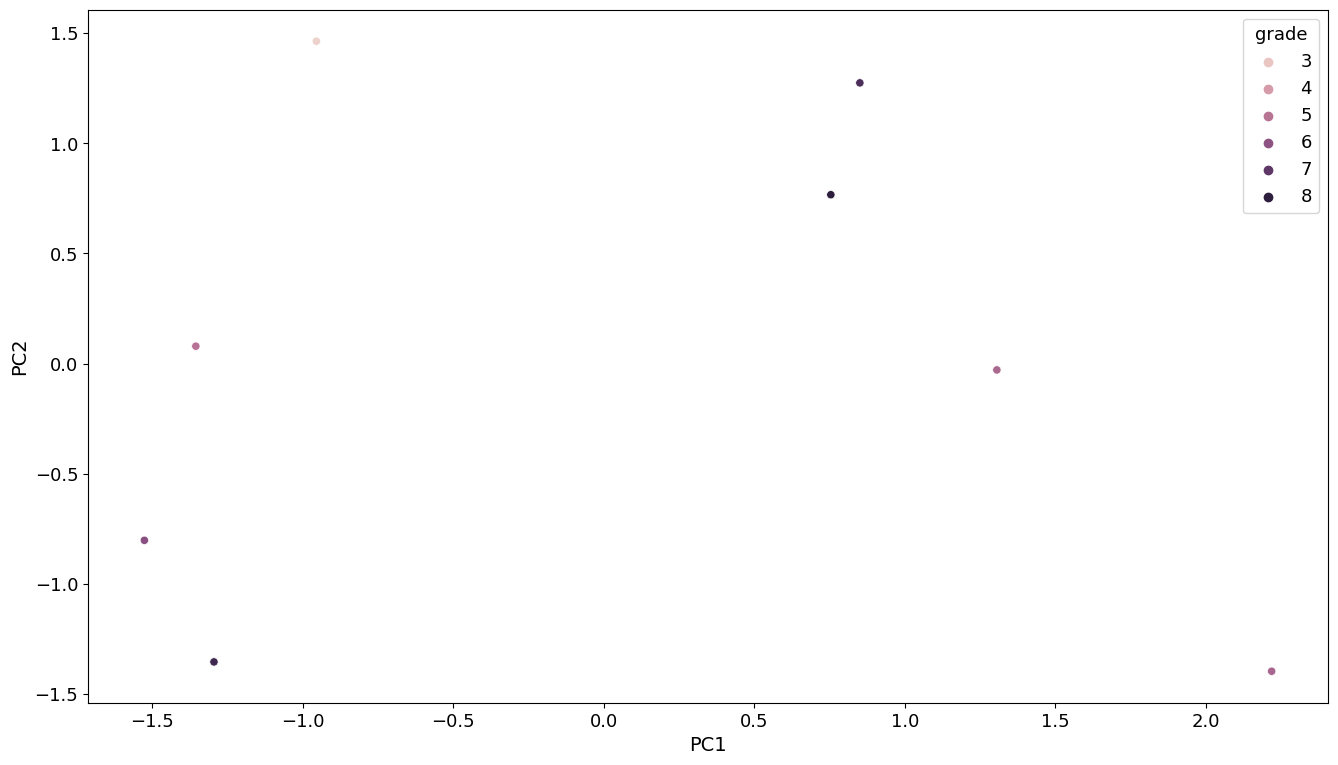

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

X = ai.drop(["grade","student"], axis=1)

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_std)

result = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
result['grade'] = ai['grade']

import seaborn as sns
sns.scatterplot(x='PC1', y='PC2', hue='grade', data=result)

We have applied the PCA model and now we can identify clusters using KMeans:

In [56]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(principal_components)
cluster_labels = kmeans.labels_

/Users/fasteno/.virtualenvs/evalpaper/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


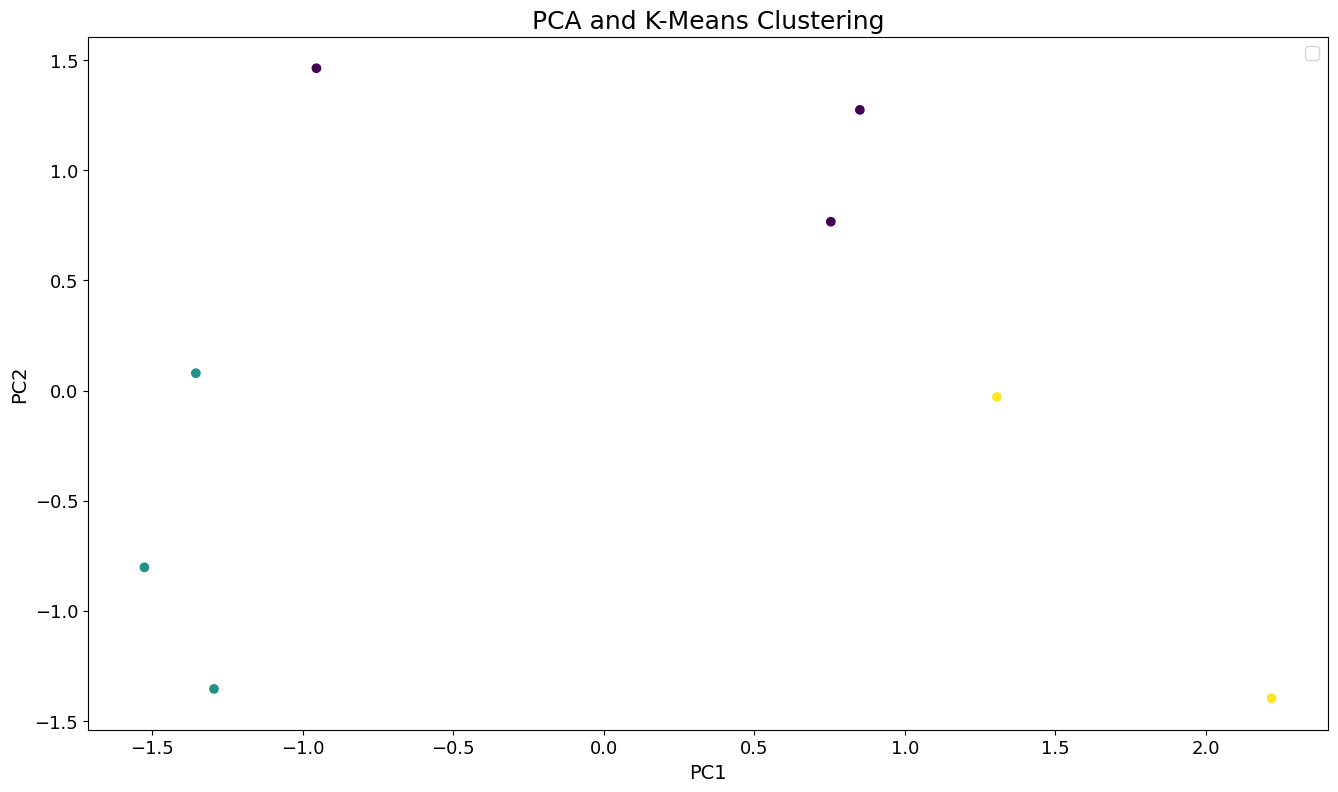

In [57]:
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cluster_labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA and K-Means Clustering')
plt.legend()
plt.show()

We have identified 3 clusters. However, since there are only 8 data points, the clusters are not very clear. As soon as we have more data, the clustering will be better. We can also try to create clusters for the survey scores:

In [58]:
ai["survey_score"]

0    3.65
1    3.60
2    4.00
3    4.20
4    3.90
5    3.70
6    4.15
7    3.90
Name: survey_score, dtype: float64

In [59]:
X = ai["survey_score"].values.reshape(-1, 1)
X_std = (X - X.mean(axis=0)) / X.std(axis=0)

kmeans = KMeans(n_clusters=3)

kmeans.fit(X_std)

cluster_labels = kmeans.labels_

/Users/fasteno/.virtualenvs/evalpaper/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


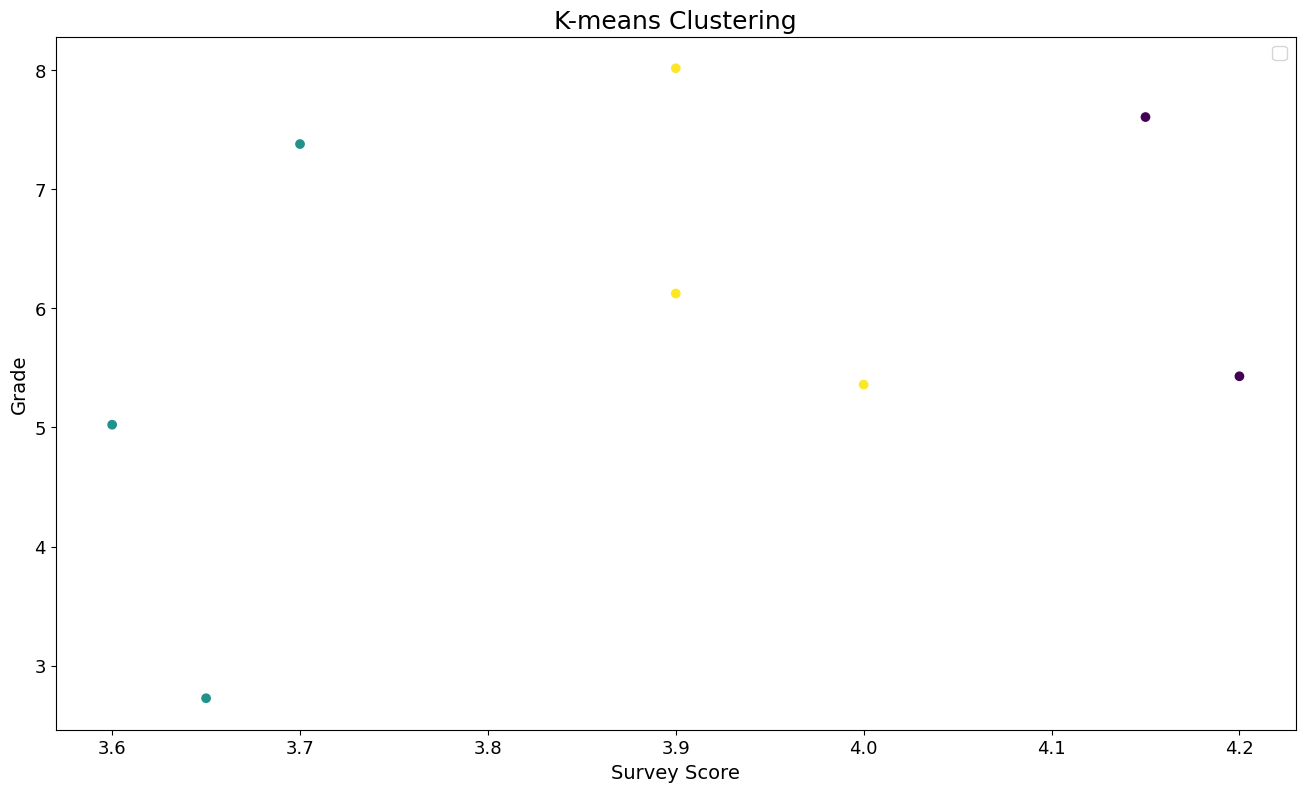

In [60]:
plt.scatter(X[:, 0], ai['grade'], c=cluster_labels)
plt.xlabel('Survey Score')
plt.ylabel('Grade')
plt.title('K-means Clustering')
plt.legend()
plt.show()

## Conclusions

We have performed a thorough analysis on the survey and app data and have found the following conclusions:

* **There is no correlation between the grade and the other variables (time left, interactions, etc.)** We have performed several statistical tests which show no correlation. However, the data is still very limited; future experiments could confirm some correlations, which is what we expected.

* **The app is entertaining for students and helps them to learn but the usability is not the best.** Although the scores for the survey questions are all very good, the highest rated questions are the collaboration and the education ones, while the lowest rated questions were the usability ones.

* **The grades are good on average and the students use the suggestions.** We have analysed the interactions and the suggestions and have found out that they have helped the students. It would be great to have some grades for the PC students too.